#Descrição do projeto
https://energiaeambiente.org.br/qualidadedoar/

Uma serie de atividades voltadas para a ciencia de dados

Usamos um banco de dados que une as entradas sobre poluição do ar de diversos anos no rio de janeiro, os dados ja foram pré processados e unificados para evitar problemas, o index e a data e hora de cada entrada, começando em 2015 e terminando em 2022

Temos as colunas:

Estacao - contem a localização da medida da poluição no ar

Codigo -

Poluente - O tipo de poluente sendo medido

Valor - A quantidade de poluição medida no ar pela unidade de medida em unidade

Unidade - A unidade de medida para a poluição utilizada

Tipo - Se a medida foi automatica ou manual


##Preparação
Nos importamos o arquivo CSV com a qualidade de ar no rio de janeiro em varios pontos, de 2015 a 2022

Esses dados ja foram processados para formarem uma tabela homogenea só, que usa com index as datas e hora de cada medição

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('drive/MyDrive/Air_Complete.csv')
df['Datetime']=pd.to_datetime(df['Datetime'])
df=df.set_index('Datetime')
df.sort_index(inplace=True)
df.dropna(inplace=True)
df_head=df.head(10)
df_head

,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
Datetime,,,,,,
2015-01-01 00:30:00,BM - Bocaininha,RJ57,MP10,21.000000,ug/m3,Automatico
2015-01-01 00:30:00,RJ - Maracanã,RJ14,O3,7.400000,ppb,Automatico
2015-01-01 00:30:00,Pref - São Cristovão,RJ87,O3,27.220000,ppm,Automatico
2015-01-01 00:30:00,Pref - São Cristovão,RJ87,CO,0.130000,ppm,Automatico
2015-01-01 00:30:00,Mc - Fazenda Aires,RJ68,NO2,3.700000,ppb,Automatico
2015-01-01 00:30:00,Mc - Fazenda Aires,RJ68,CO,0.130000,ppm,Automatico
2015-01-01 00:30:00,Mc - Fazenda Aires,RJ68,O3,31.899000,ppb,Automatico
2015-01-01 00:30:00,Pref - São Cristovão,RJ87,SO2,2.690000,ug/m3,Automatico
2015-01-01 00:30:00,Pref - Pedra de Guaraíba,RJ92,MP10,33.000000,ug/m3,Automatico


## Atividades
A seguir temos algumas atividades que poderiamos fazer usando esse banco de dados modificado

### Atividade 1: Converter todos os tipos de poluição para ppm
ug/m3 é a medida de milionesimo de grama por metro cubico, é não particulas, por isso varia dependendo do tipo de poluente.

Para essa atividade considere 1.15 ug/m3 = 1 ppb, que seria a conversão para monoxido de carbono, um dos poluidores aereos mais comuns
Coverta ug/m3 para ppb e depois ppb para ppm

In [ ]:
def converter(row):
  if(row['Unidade']=='ppb'):
    row['Valor']=row['Valor']*1000
    row['Unidade']='ppm'
    return row
  if(row['Unidade']=='ug/m3'):
    row['Valor']=row['Valor']*1.15*1000
    row['Unidade']='ppm'
    return row
  if(row['Unidade']=='ppm'):
    return row
df_head=df_head.apply(converter,axis=1)
df_head

,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
Datetime,,,,,,
2015-01-01 00:30:00,BM - Bocaininha,RJ57,MP10,24150.000000,ppm,Automatico
2015-01-01 00:30:00,RJ - Maracanã,RJ14,O3,7400.000000,ppm,Automatico
2015-01-01 00:30:00,Pref - São Cristovão,RJ87,O3,27.220000,ppm,Automatico
2015-01-01 00:30:00,Pref - São Cristovão,RJ87,CO,0.130000,ppm,Automatico
2015-01-01 00:30:00,Mc - Fazenda Aires,RJ68,NO2,3700.000000,ppm,Automatico
2015-01-01 00:30:00,Mc - Fazenda Aires,RJ68,CO,0.130000,ppm,Automatico
2015-01-01 00:30:00,Mc - Fazenda Aires,RJ68,O3,31899.000000,ppm,Automatico
2015-01-01 00:30:00,Pref - São Cristovão,RJ87,SO2,3093.500000,ppm,Automatico
2015-01-01 00:30:00,Pref - Pedra de Guaraíba,RJ92,MP10,37950.000000,ppm,Automatico


In [ ]:
df=df.apply(converter,axis=1)

### Atividade 2: Comparar niveis de poluição ano por ano
Fazer um grafico de barra comparando a poluição total em cada ano

Dependendo do numero de entradas de cada ano, o total por tempo pode ser diferente

In [ ]:
# Adicionar a coluna 'Ano' ao DataFrame
df['Ano'] = df.index.year

# Calcular a poluição total por ano e armazenar em variáveis
valor_total_2015 = df[df['Ano'] == 2015]['Valor'].quantile(0.9999).sum()
valor_total_2016 = df[df['Ano'] == 2016]['Valor'].quantile(0.9999).sum()
valor_total_2017 = df[df['Ano'] == 2017]['Valor'].quantile(0.9999).sum()
valor_total_2018 = df[df['Ano'] == 2018]['Valor'].quantile(0.9999).sum()
valor_total_2019 = df[df['Ano'] == 2019]['Valor'].quantile(0.9999).sum()
valor_total_2020 = df[df['Ano'] == 2020]['Valor'].quantile(0.9999).sum()
valor_total_2021 = df[df['Ano'] == 2021]['Valor'].quantile(0.9999).sum()
valor_total_2022 = df[df['Ano'] == 2022]['Valor'].quantile(0.9999).sum()

# Verificar os valores
print("Valor total de 2015:", valor_total_2015)
print("Valor total de 2016:", valor_total_2016)
print("Valor total de 2017:", valor_total_2017)
print("Valor total de 2018:", valor_total_2018)
print("Valor total de 2019:", valor_total_2019)
print("Valor total de 2020:", valor_total_2020)
print("Valor total de 2021:", valor_total_2021)
print("Valor total de 2022:", valor_total_2022)


Valor total de 2015: 2698210.9483399065
Valor total de 2016: 2234272.119839626
Valor total de 2017: 15826537.762496078
Valor total de 2018: 2246209.427726176
Valor total de 2019: 937099.8261842405
Valor total de 2020: 1306091.715052204
Valor total de 2021: 625391.044999982
Valor total de 2022: 867386.4592496293


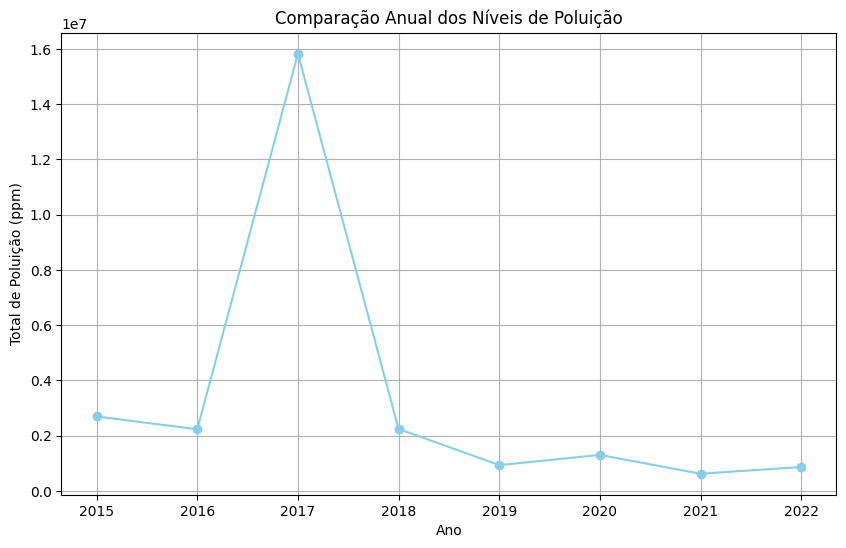

In [ ]:
# Preparar os dados para o gráfico
anos = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
valores_totais = [
    valor_total_2015, valor_total_2016, valor_total_2017,
    valor_total_2018, valor_total_2019, valor_total_2020,
    valor_total_2021, valor_total_2022
]


# Plotar o gráfico de linhas sem o ano de 2017
plt.figure(figsize=(10, 6))
plt.plot(anos, valores_totais, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Total de Poluição (ppm)')
plt.title('Comparação Anual dos Níveis de Poluição')
plt.grid(True)
plt.show()


### Atividade 3: Grafico de poluição por mes de um ano

Fazer um grafico de linhas de como a poluição varia entre os meses de um ano qualquer

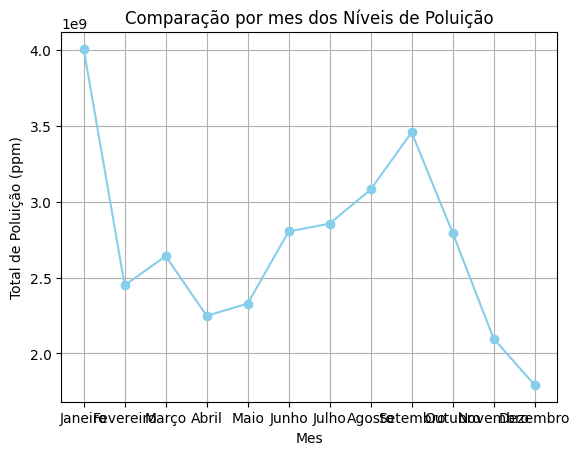

In [ ]:
subsection= []
list_values= []
Meses=['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
sum=0

subsection.append(df['2015-01-01 00:30:00':'2015-01-31 23:30:00'])
subsection.append(df['2015-02-01 00:30:00':'2015-02-28 23:30:00'])
subsection.append(df['2015-03-01 00:30:00':'2015-03-31 23:30:00'])
subsection.append(df['2015-04-01 00:30:00':'2015-04-30 23:30:00'])
subsection.append(df['2015-05-01 00:30:00':'2015-05-31 23:30:00'])
subsection.append(df['2015-06-01 00:30:00':'2015-06-30 23:30:00'])
subsection.append(df['2015-07-01 00:30:00':'2015-07-31 23:30:00'])
subsection.append(df['2015-08-01 00:30:00':'2015-08-31 23:30:00'])
subsection.append(df['2015-09-01 00:30:00':'2015-09-30 23:30:00'])
subsection.append(df['2015-10-01 00:30:00':'2015-10-31 23:30:00'])
subsection.append(df['2015-11-01 00:30:00':'2015-11-30 23:30:00'])
subsection.append(df['2015-12-01 00:30:00':'2015-12-31 23:30:00'])
for sub in subsection:
  sum=sub['Valor'].sum()
  list_values.append(sum)
plt.grid()
plt.plot(Meses,list_values,marker='o',linestyle='-', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Total de Poluição (ppm)')
plt.title('Comparação por mes dos Níveis de Poluição')
plt.show()


### Atividade 4: Grafico de poluição por entrada de lugares

Fazer um grafico de barras com a poluição por entrada de cada localização

In [ ]:
valores_totais=[]
X=[]
for label in df['Estacao'].unique():
  temp=df[df['Estacao']==label]
  valores_totais.append(temp['Valor'].sum())
  X.append(label)

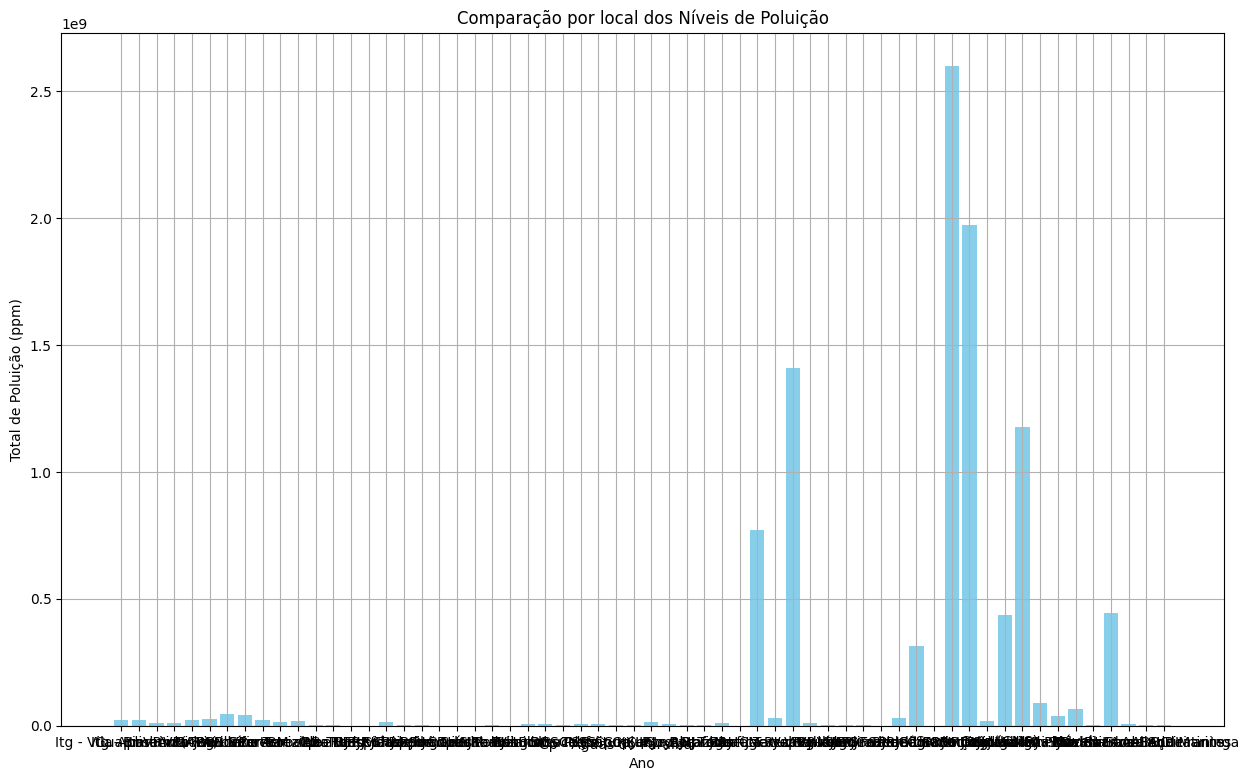

In [ ]:
plt.figure(figsize=(15, 9))
plt.bar(X[60:120],valores_totais[60:120],color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Total de Poluição (ppm)')
plt.title('Comparação por local dos Níveis de Poluição')
plt.grid(True)
plt.show()

### Atividade 5: Discrepancia entre medidas manuais e automaticas

Medir a discrepancia, ou a diferença entre a poluição relativa das entradas manuais e a relativa das automaticas

In [ ]:
# Contar o número de linhas para cada tipo
contagem_tipos = df['Tipo'].value_counts()

qtd_manual =  contagem_tipos.get('Manual', 0)
qtd_automatico = contagem_tipos.get('Automatico', 0)

# Exibir os resultados
print("Quantidade de linhas do tipo 'manual':", qtd_manual)
print("Quantidade de linhas do tipo 'automático':", qtd_automatico)

Quantidade de linhas do tipo 'manual': 17514
Quantidade de linhas do tipo 'automático': 4189021


In [ ]:
# Calcular a poluição total por ano e armazenar em variáveis
valor_total_manual = df[df['Tipo'] == "Manual"]['Valor'].quantile(0.9999).mean()
valor_total_automatico = df[df['Tipo'] == "Automatico"]['Valor'].quantile(0.9999).mean()


# Verificar os valores
print("Valor total manual:", valor_total_manual)
print("Valor total automatico:", valor_total_automatico)

Valor total manual: 590796.1458499789
Valor total automatico: 5474352.284096361


In [ ]:
valor_final_manual = valor_total_manual / qtd_manual
valor_final_automatico = valor_total_automatico / qtd_automatico
print(valor_final_manual, valor_final_automatico)

33.73279352803351 1.306833335067158


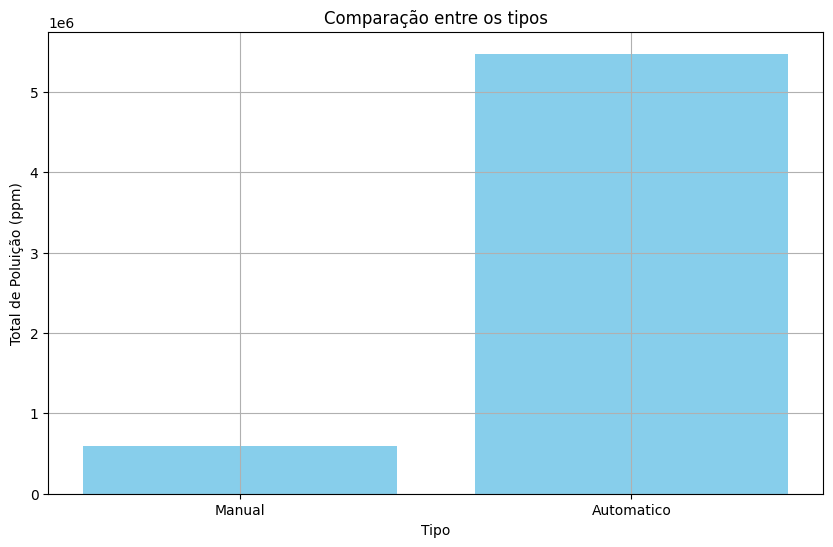

In [ ]:
import matplotlib.pyplot as plt

tipos = ['Manual', 'Automatico']
valores_totais = [valor_total_manual, valor_total_automatico]

plt.figure(figsize=(10, 6))
plt.bar(tipos, valores_totais, color='skyblue')
plt.xlabel('Tipo')
plt.ylabel('Total de Poluição (ppm)')
plt.title('Comparação entre os tipos')
plt.grid(True)
plt.show()
